## Fashion-mnistを使ったDeep Learning

In [91]:
# kerasをimportします(tensorflowのverも確認)
from __future__ import absolute_import, division, print_function, unicode_literals
 
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
 
print(tf.__version__)

1.13.1


In [92]:
# データのロードを実施
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [93]:
# ラベル名を定義する
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [94]:
# imageデータ（学習）の形を確認する
train_images.shape

(60000, 28, 28)

In [95]:
# ラベルデータ（学習）の形を確認する
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [96]:
# imageデータ（テスト）の形を確認する
test_images.shape

(10000, 28, 28)

In [97]:
# ラベルデータ（テスト）の形を確認する
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

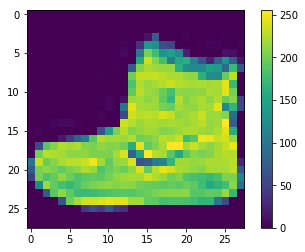

In [98]:
# 画像を表示してみる(1番目の画像)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

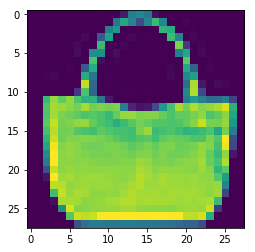

In [99]:
# 画像を表示してみる(100番目の画像)
plt.imshow(train_images[100])
plt.show()

In [100]:
# 0-255の整数値を0〜1の小数に変換する(正規化)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images / 255.0
test_images = test_images / 255.0

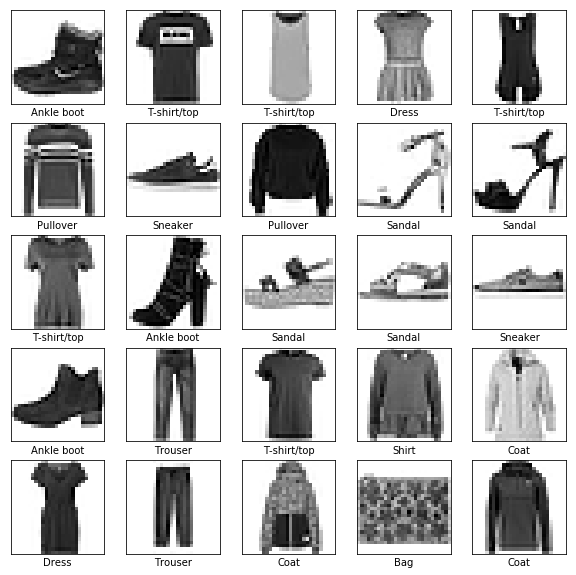

In [101]:
# input画像とラベルとラベル名がそれぞれ正確に紐づいていることを出力して確認する
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [102]:
# すごくシンプルなモデル（チュートリアルに記載されているもの）
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [103]:
# optimixerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
# 実際に実行してみるとtestデータで90%程度
result = model.fit(train_images, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5549 - acc: 0.8094 - val_loss: 0.4828 - val_acc: 0.8317
Epoch 2/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4036 - acc: 0.8595 - val_loss: 0.4224 - val_acc: 0.8509
Epoch 3/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3660 - acc: 0.8702 - val_loss: 0.3924 - val_acc: 0.8614
Epoch 4/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3415 - acc: 0.8770 - val_loss: 0.3911 - val_acc: 0.8597
Epoch 5/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3216 - acc: 0.8838 - val_loss: 0.3690 - val_acc: 0.8671
Epoch 6/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3081 - acc: 0.8879 - val_loss: 0.3600 - val_acc: 0.8701
Epoch 7/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2943 - acc: 0.8939 - val_loss: 0.

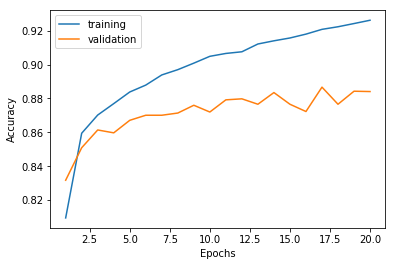

In [105]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['acc'], label="training")
plt.plot(range(1, 21), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## CNNで実行してみる

In [106]:
# チャネルの追加
X_train = train_images.reshape(train_images.shape + (1,))
X_test = test_images.reshape(test_images.shape + (1,))

In [135]:
# モデルの定義
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [136]:
# optimizerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [138]:
# 実際に実行してみるとtestデータで91~93%程度
result = model.fit(X_train, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(X_test, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.4602 - acc: 0.8309 - val_loss: 0.3513 - val_acc: 0.8741
Epoch 2/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.3446 - acc: 0.8743 - val_loss: 0.2971 - val_acc: 0.8904
Epoch 3/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.3032 - acc: 0.8881 - val_loss: 0.2624 - val_acc: 0.9055
Epoch 4/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2742 - acc: 0.9003 - val_loss: 0.2552 - val_acc: 0.9097
Epoch 5/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2540 - acc: 0.9064 - val_loss: 0.2435 - val_acc: 0.9127
Epoch 6/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2418 - acc: 0.9107 - val_loss: 0.2299 - val_acc: 0.9172
Epoch 7/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.2261 - acc: 0.9173 - val_loss: 0.

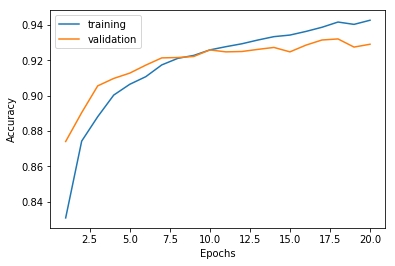

In [139]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['acc'], label="training")
plt.plot(range(1, 21), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## 最適化手法やパラメーターを少しいじってみる

In [140]:
# RMSpropを使い、dropoutなどを調整
# Epoch 10回で実行してみた結果（精度良くない、実際に実行しなくてよい）
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# one-hot vector形式に変換する
from keras.utils import np_utils
Y_train = np_utils.to_categorical(train_labels, 10)
Y_test = np_utils.to_categorical(test_labels, 10)

from keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
result = model.fit(X_train, Y_train,
                batch_size=128,
                epochs=10,
                verbose=1,
                validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.8872 - acc: 0.6859 - val_loss: 0.5714 - val_acc: 0.7815
Epoch 2/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.5549 - acc: 0.7918 - val_loss: 0.4793 - val_acc: 0.8198
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.4831 - acc: 0.8210 - val_loss: 0.4313 - val_acc: 0.8447
Epoch 4/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.4358 - acc: 0.8419 - val_loss: 0.3983 - val_acc: 0.8585
Epoch 5/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.4018 - acc: 0.8546 - val_loss: 0.3746 - val_acc: 0.8658
Epoch 6/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.3757 - acc: 0.8655 - val_loss: 0.3519 - val_acc: 0.8762
Epoch 7/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.3548 - acc: 0.8705 - val_loss: 0.

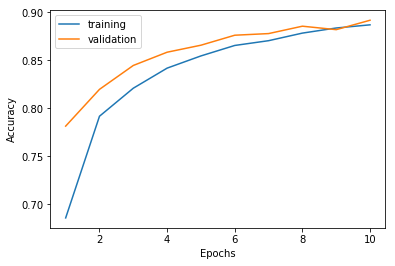

In [142]:
%matplotlib inline
 
plt.plot(range(1, 11), result.history['acc'], label="training")
plt.plot(range(1, 11), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### ちなみにDeeplearningを使わない手法であればこちらを参考に
http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/

## Dropoutを外して実行してみる

In [143]:
# モデルの定義
# trainのACCが 100%に近づいていることを確認してもらいたい 、testのACCは向上していない(過学習)
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# optimizerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 実際に実行してみるとtestデータで90%程度
result = model.fit(X_train, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(X_test, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.4825 - acc: 0.8275 - val_loss: 0.3716 - val_acc: 0.8690
Epoch 2/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.2862 - acc: 0.8977 - val_loss: 0.2832 - val_acc: 0.8972
Epoch 3/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2371 - acc: 0.9137 - val_loss: 0.2446 - val_acc: 0.9103
Epoch 4/20
60000/60000 [==============================] - 9s 158us/step - loss: 0.2045 - acc: 0.9261 - val_loss: 0.2404 - val_acc: 0.9135
Epoch 5/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1777 - acc: 0.9348 - val_loss: 0.2245 - val_acc: 0.9195
Epoch 6/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1533 - acc: 0.9447 - val_loss: 0.2198 - val_acc: 0.9207
Epoch 7/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.1361 - acc: 0.9506 - val_loss: 0.22

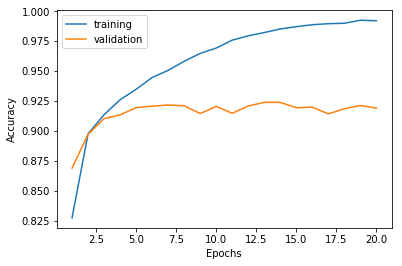

In [145]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['acc'], label="training")
plt.plot(range(1, 21), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Kerasのapplication modelを使ってみる
https://keras.io/ja/applications/

In [107]:
from keras.applications.densenet import DenseNet121
from keras.preprocessing import image
from keras.models import Model
from keras import models
from keras import layers

base_model = DenseNet121(weights='imagenet', include_top=False,  input_shape = (32, 32, 3))

top_model = models.Sequential()
top_model.add(layers.Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(layers.Dense(128, activation='relu'))
top_model.add(layers.Dropout(0.5))
top_model.add(layers.Dense(10, activation='softmax'))

model = Model(inputs=base_model.input, outputs=top_model(base_model.output))

# 100層以降の重みは変更する
for layer in base_model.layers[:100]:
    layer.trainable = False


In [108]:
# optimizerと評価手法の設定
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [109]:
# 32x32以上じゃないと読み込んでくれないので、無理やり 0 padding あとRGB(3チャンネル)
X_train_app = np.pad(X_train,[(0,0),(2,2),(2,2),(0,2)],"constant")
X_test_app = np.pad(X_test,[(0,0),(2,2),(2,2),(0,2)],"constant")

In [112]:
# 実際に実行してみると...(時間かかるでのepoch減らすこと)
result = model.fit(X_train_app, train_labels,
                batch_size=128,
                epochs=20,
                verbose=1,
                validation_data=(X_test_app, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 135s 2ms/step - loss: 0.4278 - acc: 0.8587 - val_loss: 2.6366 - val_acc: 0.4580
Epoch 2/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2752 - acc: 0.9053 - val_loss: 2.1608 - val_acc: 0.5399
Epoch 3/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2353 - acc: 0.9189 - val_loss: 1.9010 - val_acc: 0.6392
Epoch 4/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2085 - acc: 0.9264 - val_loss: 3.6031 - val_acc: 0.4635
Epoch 5/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1902 - acc: 0.9331 - val_loss: 5.2932 - val_acc: 0.3537
Epoch 6/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1773 - acc: 0.9379 - val_loss: 3.9110 - val_acc: 0.3846
Epoch 7/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1594 - acc: 0.9436 - val_loss: 3.3783 - val_ac

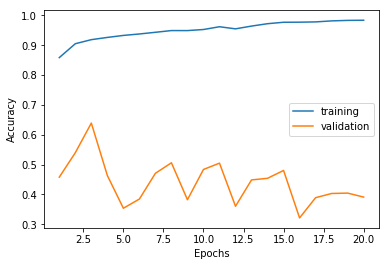

In [114]:
%matplotlib inline
 
plt.plot(range(1, 21), result.history['acc'], label="training")
plt.plot(range(1, 21), result.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## ローテートなどのAugmentationを使う

## モデルの保存と推論

In [22]:
#モデルの保存
#model.save('./model/fashion_model.h5', include_optimizer=False)

In [113]:
"""
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import img_to_array, load_img

model=load_model('./model/fashion_model.h5')

img_path = ('./sample/XXXXX.png')
img = img_to_array(load_img(img_path, target_size=(28,28)))
img_nad = img_to_array(img)/255
img_nad = img_nad[None, ...]

pred = model.predict(img_nad, batch_size=1, verbose=0)
score = np.max(pred)
pred_label = class_names[np.argmax(pred[0])]
print('name:',pred_label)
print('score:',score)
"""

"\nfrom keras.models import load_model\nimport numpy as np\nfrom keras.preprocessing.image import img_to_array, load_img\n\nmodel=load_model('./model/fashion_model.h5')\n\nimg_path = ('./sample/XXXXX.png')\nimg = img_to_array(load_img(img_path, target_size=(28,28)))\nimg_nad = img_to_array(img)/255\nimg_nad = img_nad[None, ...]\n\npred = model.predict(img_nad, batch_size=1, verbose=0)\nscore = np.max(pred)\npred_label = class_names[np.argmax(pred[0])]\nprint('name:',pred_label)\nprint('score:',score)\n"